## Proyecto 2 - Image Classification with CNN

**Silverio Carmona Lozano    | 199618115**

**Lady D. Oñate Vega         | 200814451**

**Carlos J. Quispe Castilla  | 201627368**

**Johan D. Suarez Acero      | 200713010**

# Punto 1. Direct Prediction

## Importación de las librerias

In [1]:
from keras.utils import np_utils
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

Using TensorFlow backend.


In [4]:
!pwd

/home/silverio_carmona/Notebooks


## Ejemplo de como se pasa de imagen a matrices con una imagen de la categoria egret

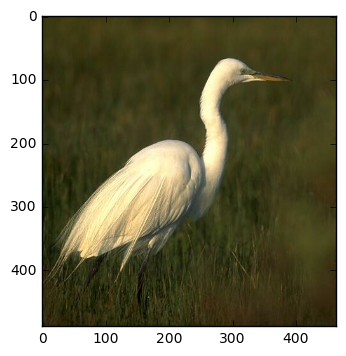

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

img = load_img('../datasets/birds1/birds/egret/egr011.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
plt.imshow(img)

## Importamos el modelo VGG16 pre-entrenado de imagenet. 

In [8]:
#En la importacion del modelo se incluye traer la ultima capa del modelo, dado que no se va hacer transfer learning.
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=True,
                  input_shape=(224, 224, 3))

553467904/553467096 [==============================] - 10s 0us/step


In [9]:
# Se inicializa una red muy simple, donde unicamente se añade el modelo de vgg16 anteriormente importado.
from keras.models import Sequential
model = Sequential()
model.add(conv_base)
conv_base.trainable=False

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1000)              138357544 
Total params: 138,357,544
Trainable params: 0
Non-trainable params: 138,357,544
_________________________________________________________________


## Definición de parámetros

In [11]:
# Se establece las dimensiones con las que van a quedar nuestras imagenes, el numero de epochs, 
# y el tamaño de la data que vamos a predecir.
img_width, img_height = 224, 224

train_data_dir = '../datasets/birds1/birds'
batch_size = 600

## Creación de la  base a predecir

In [12]:
# Se genera la base a partir de las imagenes
train_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 600 images belonging to 6 classes.


## Predicción de las imagenes 

In [13]:
#Se invoca el modelo inicializado y se predice la clase a partir del mismo, quedando almacenado en el vector vgg16output
for x_batch, y_batch in train_generator:
  print(y_batch)
  break
vgg16output = model.predict_classes(x_batch)

[[1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]
 ...
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [14]:
# vector resultante que contiene los resultados de la predicción
vgg16output

array([669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669,
       669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669,
       669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669,
       669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669,
       669, 669, 669, 669, 999, 669, 669, 669, 669, 669, 669, 669, 669,
       999, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669,
       669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 999,
       669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669,
       669, 669, 669, 669, 669, 669, 999, 669, 669, 669, 669, 669, 669,
       999, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669,
       669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669,
       669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669,
       669, 669, 669, 669, 669, 669, 669, 669, 999, 669, 669, 669, 669,
       669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 669, 66

In [20]:
y_vect=[]
for i in range(batch_size):
    for j in range(6): 
        if y_batch[i,j] == 1:
            y_vect.append(j)

In [21]:
y_vect

[4, 5, 5, 2, 4, 0, 4, 2, 2, 3]

## Visualización del resultado de la predicción contra la categoria real

In [24]:
# Se construye un df con los dos vectores, la predicción y el valor real para poder compararlo por medio de una matriz de confusion 
# o tabla de frecuencias
d={"Clase_Pajaro":y_vect, "Clase_VGG":vgg16output}

In [25]:
print(d)

{'Clase_Pajaro': [4, 5, 5, 2, 4, 0, 4, 2, 2, 3], 'Clase_VGG': array([669, 669, 669, 669, 669, 669, 669, 669, 669, 669], dtype=int64)}


In [27]:
df=pd.DataFrame(d)

In [28]:
df.head()

,Clase_Pajaro,Clase_VGG
0,4,669
1,5,669
2,5,669
3,2,669
4,4,669


In [51]:
# Se crea la matriz de confusión 
pd.crosstab(df.Clase_Pajaro,df.Clase_VGG)

Clase_VGG,669
Clase_Pajaro,
0,1
2,3
3,1
4,3
5,2


## Resultados

Como podemos ver, el modelo "Vgg16" de imagenet nos está prediciendo todas las cases como la clase número 669. Esta categoria esta denominada como "Mosquito Net". Esto puede llegar a tener sentido, porque como todas las imagenes son de aves, se esperaria que una buena parte de los datos sean clasificados en una misma categoria.